In [1]:
%pylab inline
import random
import tensorflow as tf
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
# training data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data/', one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [3]:
# hyper-params
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [5]:
# placeholders
X = tf.placeholder('float', [None, 28*28])
Y = tf.placeholder('float', [None, 10])    # 0-9
dropout_rate = tf.placeholder('float')

In [6]:
# weights
# W1 = tf.Variable(tf.random_normal([28*28, 256]))
# W2 = tf.Variable(tf.random_normal([256, 256]))
# W3 = tf.Variable(tf.random_normal([256, 10]))
# Xavier keeps the scale of gradients roughly the same in all layers
W1 = tf.get_variable('W1', shape=[784, 256], initializer=tf.contrib.layers.xavier_initializer()) 
W2 = tf.get_variable('W2', shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer()) 
W3 = tf.get_variable('W3', shape=[256, 10], initializer=tf.contrib.layers.xavier_initializer()) 

In [7]:
# biases
b1 = tf.Variable(tf.random_normal([256]))
b2 = tf.Variable(tf.random_normal([256]))
b3 = tf.Variable(tf.random_normal([10]))

In [8]:
# layers
_L1 = tf.nn.relu(tf.add(tf.matmul(X, W1), b1))
L1 = tf.nn.dropout(_L1, dropout_rate)
_L2 = tf.nn.relu(tf.add(tf.matmul(L1, W2), b2))
L2 = tf.nn.dropout(_L2, dropout_rate)
hypothesis = tf.add(tf.matmul(L2, W3),  b3)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(hypothesis, Y))
# hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
# cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hypothesis), reduction_indices=1))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [9]:
# train
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
for epoch in range(training_epochs):
    avg_cost =0.
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={X: batch_xs, Y: batch_ys, dropout_rate: 0.7})    # deactivate 30%
        avg_cost += sess.run(cost, feed_dict={X: batch_xs, Y: batch_ys, dropout_rate: 1.0}) / total_batch
    print epoch + 1, avg_cost

1 0.341002754195
2 0.123391390114
3 0.0853244954686
4 0.0650085194392
5 0.0512771059772
6 0.0422867586582
7 0.0363792413439
8 0.029870590052
9 0.0252635351734
10 0.0221448461161
11 0.0195190148772
12 0.0168861986277
13 0.0144065293313
14 0.0135877492531
15 0.012508757161


[6]


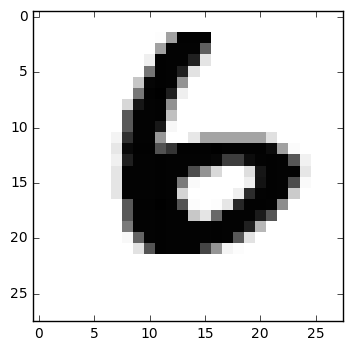

In [10]:
# test
n = random.randint(0, mnist.test.num_examples)
pylab.imshow(mnist.test.images[n:n+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
print sess.run(tf.argmax(hypothesis, 1), {X: mnist.test.images[n:n+1], dropout_rate: 1.0})

In [11]:
# eval
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
print sess.run(accuracy, {X: mnist.test.images, Y: mnist.test.labels, dropout_rate: 1.0})

0.9816


# Performance

- Softmax (baseline): 91.4
- DNN: 94.4
- +Xavier: 97.8
- +Dropout: 98.0
- CNN: 99.2